In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
caminho_dados = '/home/breno/Documentos/projeto_caique'
os.listdir(caminho_dados)

['breno', 'dados.xlsx', 'novo', 'BNDO.csv']

In [3]:
dados = pd.read_excel(caminho_dados + '/dados.xlsx')

In [4]:
# vou criar um header pra ficar mais facil de ler cada uma das colunas:
header = [
    'Data Medicao',
    'Dir Vento',
    'Evapo Piche',
    'Evapotransp Potencial',
    'Evapotransp Real',
    'Insolacao Total',
    'Nebulosidade',
    'No de dias com prec pluv',
    'Prec Total',
    'Pressao',
    'T max',
    'T media',
    'T min',
    'UR',
    'Vento max',
    'Vento med',
    'Vis med',
    'NaN'
]

In [5]:
dados_tratado = dados[382:] # so a partir daqui eu tenho dado
dados_tratado.columns = header
dados_tratado = dados_tratado.set_index([dados_tratado['Data Medicao']])
dados_tratado.drop('Data Medicao', axis=1)
dados_tratado['Prec Total'] = pd.to_numeric(dados_tratado['Prec Total']) # teria que fazer isso com todos os que tao c erro....

# Tentando co os dados do BNDO

In [34]:
dados = pd.read_csv(caminho_dados + '/BNDO.csv', decimal=",")

/home/breno/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (0,3,4,5,6,7,8,9,10,11,12,13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [35]:
header = [
    'Num Estacao',
    'Tipo Estacao',
    'Data',
    'Lat',
    'Lon',
    'Quadrado',
    'SubQuadrado',
    'Mes',
    'Ano',
    'Dir Vento',
    'Unidade VEnto',
    'Int Vento',
    'Int Vento nos',
    'Int Vento m/s',
    'Prec'
]

In [133]:
BNDO = dados[3:]
BNDO.columns = header
BNDO = BNDO.drop('Tipo Estacao', axis=1)
BNDO = BNDO.drop('Num Estacao', axis=1)
BNDO = BNDO.drop('Quadrado', axis=1)
BNDO = BNDO.drop('SubQuadrado', axis=1)
BNDO = BNDO.drop('Mes', axis=1)
BNDO = BNDO.drop('Ano', axis=1)
BNDO = BNDO.drop('Lat', axis=1)
BNDO = BNDO.drop('Lon', axis=1)
# manualmente troquei cada um dos que tava separado por virgula
BNDO['Int Vento nos'][17291] = 4.63
BNDO['Int Vento nos'][39256] = 6.1733
BNDO['Int Vento nos'][50715] = 7.2
BNDO['Int Vento nos'][56127] = 10.3
BNDO['Int Vento nos'][61028] = 5.14
BNDO['Int Vento nos'][63083] = 5.14




BNDO['Int Vento nos'] = pd.to_numeric(BNDO['Int Vento nos'])
BNDO['Dir Vento'] = pd.to_numeric(BNDO['Dir Vento'])
BNDO['Data'] = pd.to_datetime(BNDO['Data'])
BNDO = BNDO.set_index([BNDO['Data']])
BNDO = BNDO.drop('Data', axis=1)
BNDO['Mes'] = BNDO.index.month
BNDO

,Dir Vento,Unidade VEnto,Int Vento,Int Vento nos,Int Vento m/s,Prec,Mes
Data,,,,,,,
2057-09-07 18:00:00,50.0,3,6,6.0,"3,0867",NaN,9
1957-09-08 00:00:00,50.0,3,10,10.0,"5,1444",NaN,9
2057-09-08 12:00:00,50.0,3,10,10.0,"5,1444",NaN,9
2057-09-08 18:00:00,50.0,3,10,10.0,"5,1444",NaN,9
1957-09-09 00:00:00,50.0,3,10,10.0,"5,1444",NaN,9
...,...,...,...,...,...,...,...
2002-01-09 18:00:00,70.0,4.0,10.0,10.0,5.1444,NaN,1
2002-01-09 21:00:00,90.0,4.0,10.0,10.0,5.1444,NaN,1
2002-01-10 00:00:00,120.0,4.0,9.0,9.0,4.63,NaN,1


In [154]:
wsjan = (BNDO['Int Vento nos'] * 0.514444).where(BNDO['Mes']== 1)

In [163]:
wsdec = (BNDO['Int Vento nos'] * 0.514444).where(BNDO['Mes']== 12)

Data
1957-11-02 00:00:00   NaN
2057-11-02 12:00:00   NaN
2057-11-02 18:00:00   NaN
1963-01-18 00:00:00   NaN
2063-01-18 12:00:00   NaN
                       ..
2002-01-09 18:00:00   NaN
2002-01-09 21:00:00   NaN
2002-01-10 00:00:00   NaN
2002-10-30 06:00:00   NaN
2003-05-21 18:00:00   NaN
Name: Int Vento nos, Length: 99452, dtype: float64

<ipython-input-169-b712ec650040>:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,5))


<Figure size 720x360 with 0 Axes>

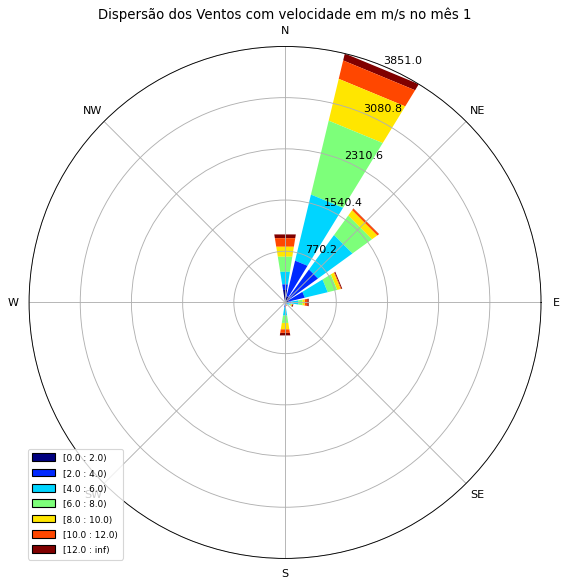

<Figure size 720x360 with 0 Axes>

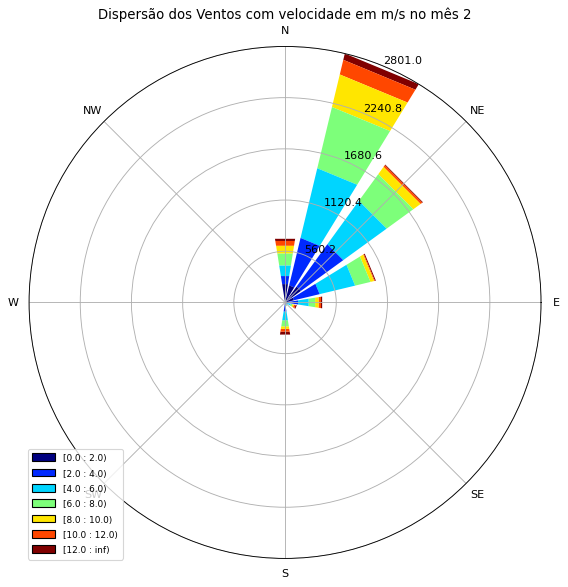

<Figure size 720x360 with 0 Axes>

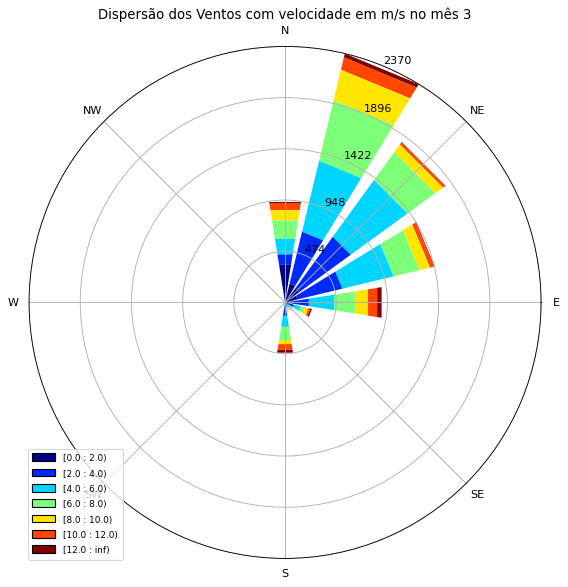

<Figure size 720x360 with 0 Axes>

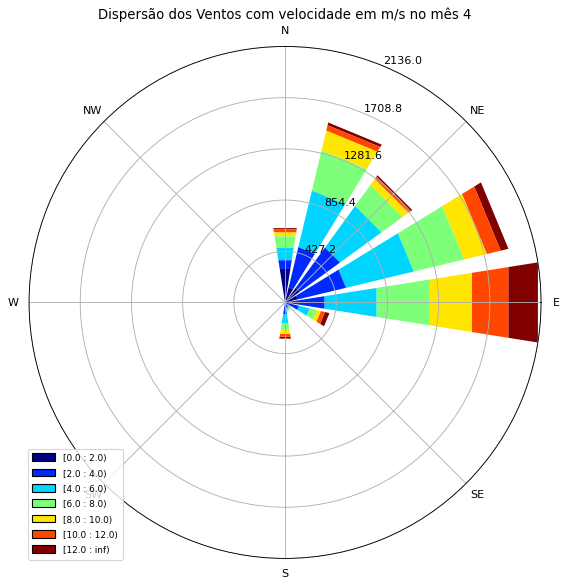

<Figure size 720x360 with 0 Axes>

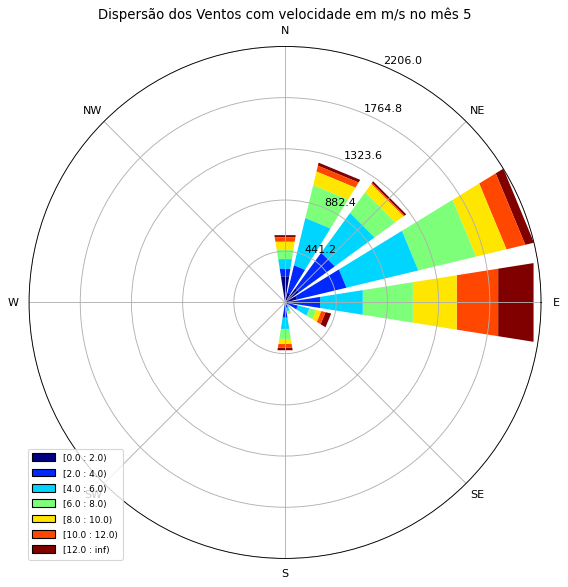

<Figure size 720x360 with 0 Axes>

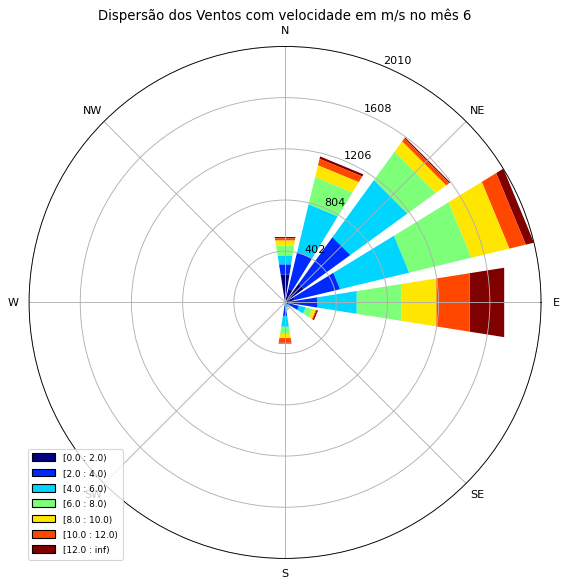

<Figure size 720x360 with 0 Axes>

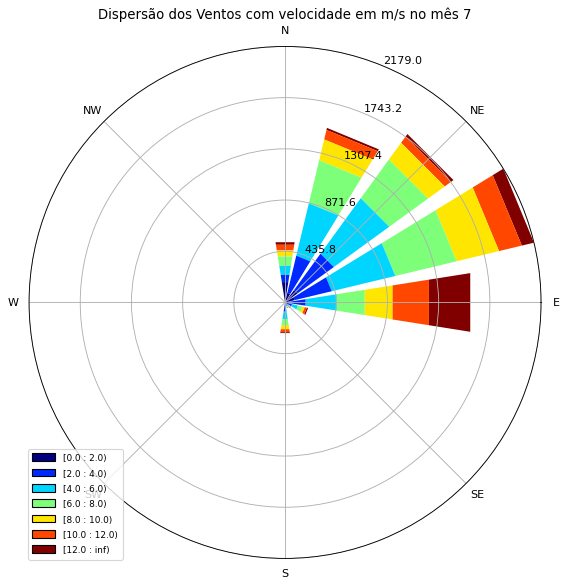

<Figure size 720x360 with 0 Axes>

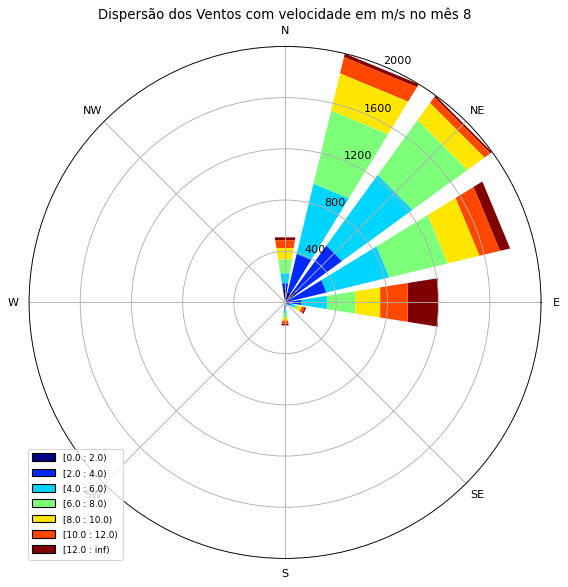

<Figure size 720x360 with 0 Axes>

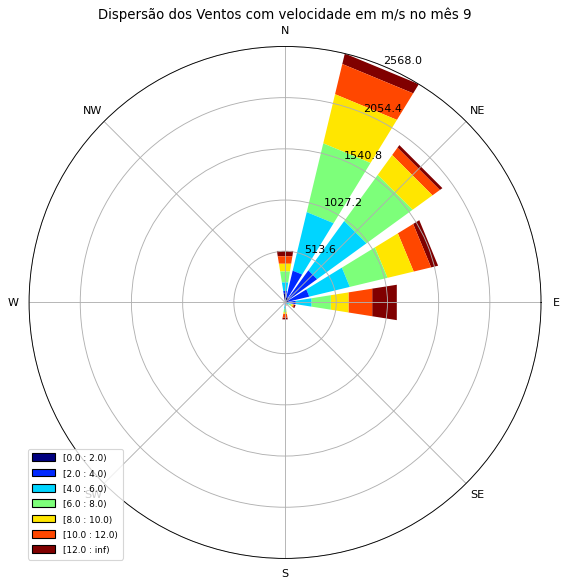

<Figure size 720x360 with 0 Axes>

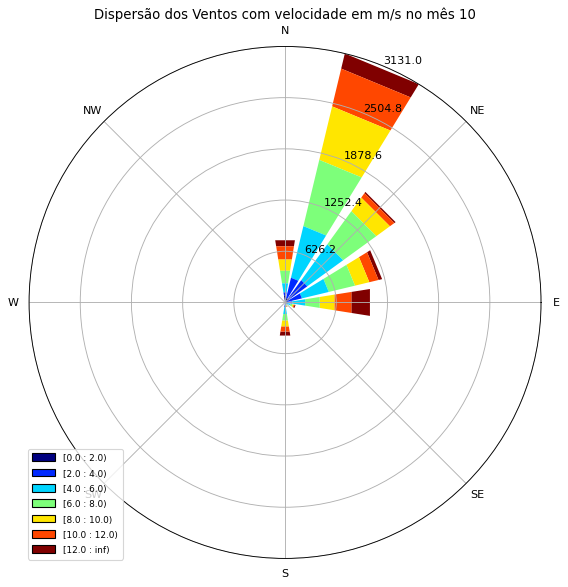

<Figure size 720x360 with 0 Axes>

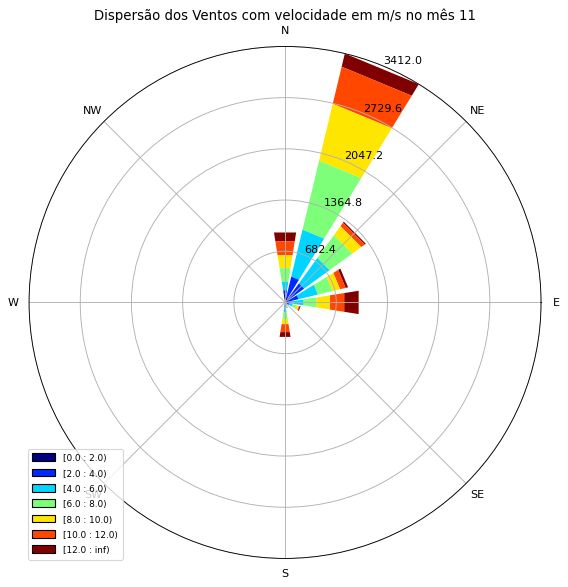

<Figure size 720x360 with 0 Axes>

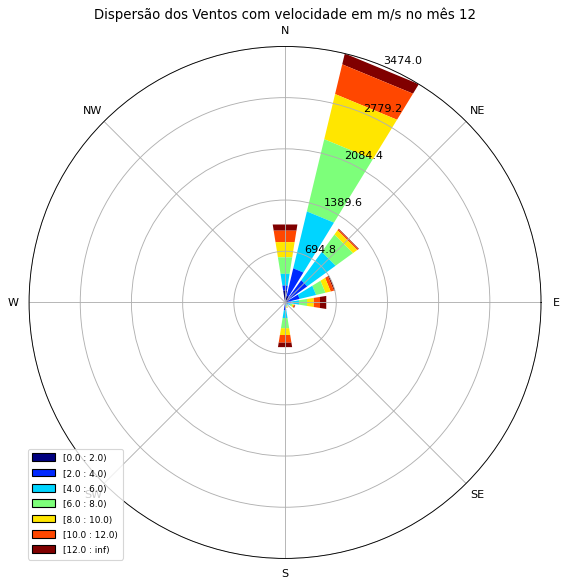

In [169]:
from windrose import WindroseAxes
# from windrose_mod_italo import WindroseAxes
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np

i = 1
while i<13:
    plt.figure(figsize=(10,5))


    # Create wind speed and direction variables

    ws = (BNDO['Int Vento nos'] * 0.514444).where(BNDO['Mes']== i)
    wd = (BNDO['Dir Vento'] * 0.514444).where(BNDO['Mes']== i)

    ax = WindroseAxes.from_ax()

    ax.set_xticklabels(['E', 'NE',  'N', 'NW', 'W', 'SW','S', 'SE'])
    #ax.set_theta_zero_location('N')

    # ax.box(wd, ws, bins=np.arange(0, 25, 3))
    ax.bar(wd, ws, bins=np.arange(0, 13, 2))

    plt.title("Dispersão dos Ventos com velocidade em m/s no mês " +str(i))
    #plt.savefig()
    ax.set_legend()
    plt.savefig(os.getcwd() + '/fig/rosa_mes_' + str(i))
    i+=1

<Figure size 720x360 with 0 Axes>

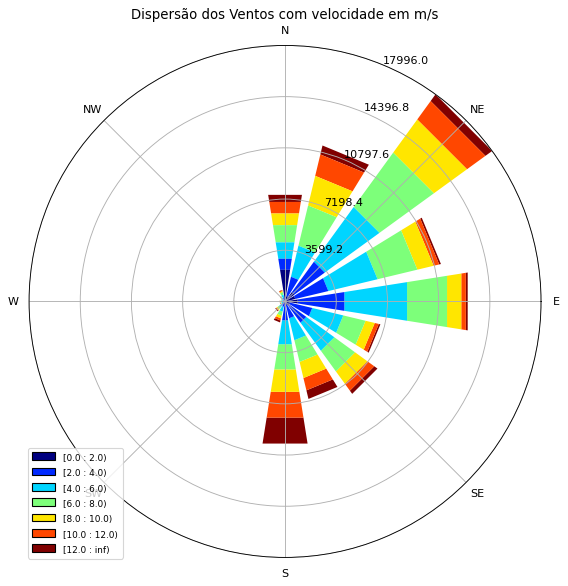

In [170]:
from windrose import WindroseAxes
# from windrose_mod_italo import WindroseAxes
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np

plt.figure(figsize=(10,5))


# Create wind speed and direction variables

ws = BNDO['Int Vento nos'] * 0.514444
wd = BNDO['Dir Vento']

ax = WindroseAxes.from_ax()

ax.set_xticklabels(['E', 'NE',  'N', 'NW', 'W', 'SW','S', 'SE'])
#ax.set_theta_zero_location('N')

# ax.box(wd, ws, bins=np.arange(0, 25, 3))
ax.bar(wd, ws, bins=np.arange(0, 13, 2))

plt.title("Dispersão dos Ventos com velocidade em m/s")
#plt.savefig()
ax.set_legend()
plt.savefig(os.getcwd() + '/fig/rosa_total' + str(i))

# Agora parece ja estar tratadinho

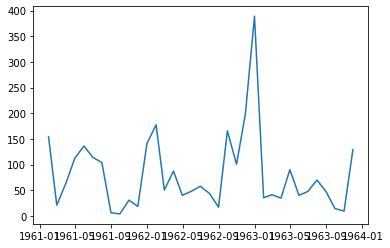

In [20]:
plt.plot(dados_tratado['Prec Total'])

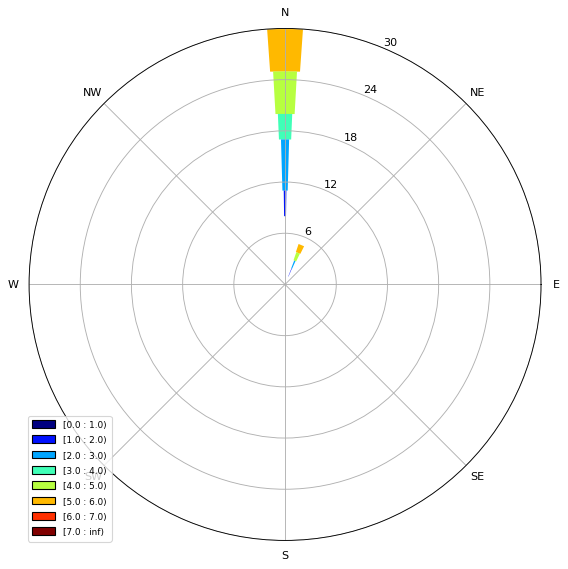

In [43]:
from windrose import WindroseAxes
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Create wind speed and direction variables

ws = np.random.random(35) * 6
wd = dados_tratado['Dir Vento']

ax = WindroseAxes.from_ax()

ax.set_xticklabels(['E', 'NE',  'N', 'NW', 'W', 'SW','S', 'SE'])
#ax.set_theta_zero_location('N')

ax.box(wd, ws, bins=np.arange(0, 8, 1))
ax.set_legend()

# Nova tentativa

In [45]:
novo_caminho = caminho_dados + '/novo/novo1' 

In [54]:
pd.read_csv(novo_caminho + '/1930.csv',sep=';',decimal=',')

,Data Medicao\tDIRECAO PREDOMINANTE DO VENTO,MENSAL(° (gr))\tEVAPORACAO DO PICHE,MENSAL(mm)\tEVAPOTRANSPIRACAO POTENCIAL,BH MENSAL(mm)\tEVAPOTRANSPIRACAO REAL,BH MENSAL(mm)\tINSOLACAO TOTAL,MENSAL(h)\tNEBULOSIDADE,MEDIA MENSAL(décimos)\tNUMERO DE DIAS COM PRECIP. PLUV,MENSAL(número)\tPRECIPITACAO TOTAL,MENSAL(mm)\tPRESSAO ATMOSFERICA,MEDIA MENSAL(mB)\tTEMPERATURA MAXIMA MEDIA,MENSAL(°C)\tTEMPERATURA MEDIA COMPENSADA,MENSAL(°C)\tTEMPERATURA MINIMA MEDIA,MENSAL(°C)\tUMIDADE RELATIVA DO AR,MEDIA MENSAL(%)\tVENTO,VELOCIDADE MAXIMA MENSAL(m/s)\tVENTO,VELOCIDADE MEDIA MENSAL(m/s)\tVISIBILIDADE,MEDIA MENSAL(codigo)\t
0,1930-01-31\tnull\tnull\tnull\tnull\tnull\tnull...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1930-02-28\tnull\tnull\tnull\tnull\tnull\tnull...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1930-03-31\tnull\tnull\tnull\tnull\tnull\tnull...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1930-04-30\tnull\tnull\tnull\tnull\tnull\tnull...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1930-05-31\tnull\tnull\tnull\tnull\tnull\tnull...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,1963-07-31\t5\t67,3\tnull\tnull\tnull\t4,215054\t10\t69,9\t1019,246237\t24,158065\t21,055484\t17,316129\t81,491935\t7\t3\t57,419355\tnull,NaN,NaN,NaN,NaN,NaN,NaN,NaN
403,1963-08-31\t5\t84,5\tnull\tnull\tnull\t3,860215\t6\t47,3\t1018,03871\t24,609677\t21,544516\t17,429032\t78,459677\t7\t3,365591\t58,709677\tnull,NaN,NaN,NaN,NaN,NaN,NaN
404,1963-09-30\t5\t96\tnull\tnull\tnull\t4,488889\t7\t14,5\t1016,997778\t25,716667\t23,058\t19,793333\t78,175\t9\t3,944444\t55\tnull,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
405,1963-10-31\t5\t102,2\tnull\tnull\tnull\t4,817204\t2\t9,5\t1014,775269\t27,180645\t24,663226\t21,935484\t78,943548\t9\t4,774194\t53,064516\tnull,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
dados30 = pd.read_csv(novo_caminho + '/1930.csv')

ParserError: Error tokenizing data. C error: Expected 1 fields in line 11, saw 17


# Tentativa Breno

In [60]:
novo_caminho1 = novo_caminho[:-1:] + '2'
novo_caminho1

'/home/breno/Documentos/projeto_caique/novo/novo2'

In [6]:
breno_caminho = '/home/breno/Documentos/projeto_caique/breno/aa'
breno_caminho

'/home/breno/Documentos/projeto_caique/breno/aa'

In [23]:
breno_caminho[:-2] + 'bb'

'/home/breno/Documentos/projeto_caique/breno/bb'

In [85]:
# precisei ajeitar no arquivo, tava com um nome estranho no titulo das colunas

# precisei deletar no arquivo tb a parte que ele diz qual a estacao etc

dados06 = pd.read_csv(breno_caminho[:-2] + 'bb' + '/vit.csv', sep=',')
dados06[9:520]

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
9,Data Medicao,Hora Medicao,VENTO,DIRECAO HORARIA(codigo),VENTO,VELOCIDADE HORARIA(m/s)
10,1961-01-01,0,NaN,NaN,NaN,NaN
11,1961-01-01,1200,36,4,NaN,NaN
12,1961-01-01,1800,9,3,NaN,NaN
13,1961-01-02,0,36,4,NaN,NaN
...,...,...,...,...,...,...
515,1961-06-18,1200,23,3,NaN,NaN
516,1961-06-18,1800,23,2,NaN,NaN
517,1961-06-19,0,23,4,NaN,NaN
518,1961-06-19,1200,23,3,NaN,NaN


In [86]:
header = [
    'Data Medicao',
    'Hora',
    'Dir Vento',
    'Vel Vento',
    '-',
    '-',
]

In [87]:
dados_tratado = dados06[10:] # so a partir daqui eu tenho dado -> ir no chutometro
dados_tratado.columns = header
dados_tratado = dados_tratado.set_index([dados_tratado['Data Medicao']])
dados_tratado = dados_tratado.drop('Data Medicao', axis=1)
del dados_tratado ['-'] 
dados_tratado
# dados_tratado['Prec Total'] = pd.to_numeric(dados_tratado['Prec Total']) # teria que fazer isso com todos os que tao c erro....

,Hora,Dir Vento,Vel Vento
Data Medicao,,,
1961-01-01,0,NaN,NaN
1961-01-01,1200,36,4
1961-01-01,1800,9,3
1961-01-02,0,36,4
1961-01-02,1200,36,2
...,...,...,...
2010-07-30,1200,36,3
2010-07-30,1800,NaN,NaN
2010-07-31,0,36,1


In [88]:
dados_dir = dados_tratado[dados_tratado['Dir Vento'].notna()] # dataframe sem nenhum direcao de vento como NaN
dados_vel = dados_dir[dados_dir['Vel Vento'].notna()] # dataframe sem nenhuma dir nem vel como NaN

In [89]:
# python interpretou esses carinhas como string, vamos passa-los para numeros!

dados_vel['Vel Vento'] = pd.to_numeric(dados_vel['Vel Vento'])
dados_vel['Dir Vento'] = pd.to_numeric(dados_vel['Dir Vento'])

<ipython-input-89-76827b92d0ce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_vel['Vel Vento'] = pd.to_numeric(dados_vel['Vel Vento'])
<ipython-input-89-76827b92d0ce>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_vel['Dir Vento'] = pd.to_numeric(dados_vel['Dir Vento'])


In [94]:
dados_vel[31000:]

,Hora,Dir Vento,Vel Vento
Data Medicao,,,
2000-04-03,1200,18,8.0
2000-04-03,1800,18,10.6
2000-04-04,0,18,5.5
2000-04-04,1200,18,5.3
2000-04-04,1800,18,5.8
...,...,...,...
2010-07-29,1200,9,2.0
2010-07-30,0,0,0.0
2010-07-30,1200,36,3.0


In [69]:
dados_vel.index

Index([], dtype='object', name='Data Medicao')

In [70]:
# fazer logica de somar 180 e chegar no norte, o problema vai ser pra inverter de horario p antihorario...
# 30 em horario equivale a 360 - 30 em AH
# o limite do meu carinha eh de 0 a 365
# 0 = L , 90 = N, 180 = W, 270 = S
# quero fazer com que 0 = W; 90 = N; 180=L;270 = E

# ESSA FUNCAO SO PASSA O 0 PRO LESTE E FAZ A ROSA RODAR NO SENTIDO AH

# def vento_inverso(dire):
#     if dire<=180:
#         dire = 180 - dire
#     else:
#         dire = 360 - (dire-180)
#     return dire
    
    

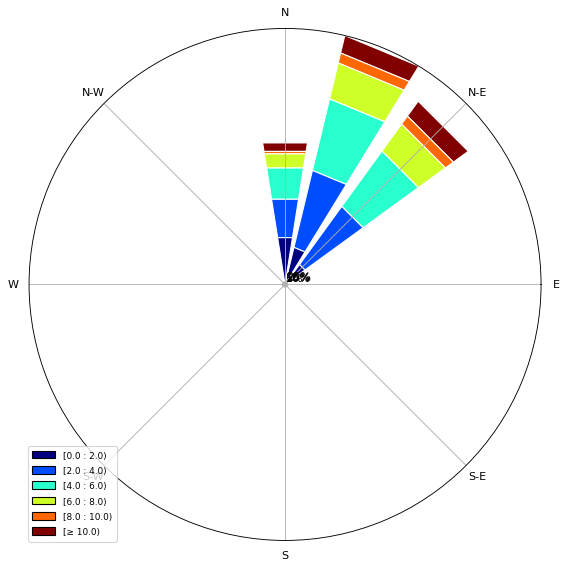

In [104]:
from windrose_mod_italo import WindroseAxes
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Create wind speed and direction variables

ws = dados_vel['Vel Vento'][31000:]
wd = dados_vel['Dir Vento'][31000:]
# wd = [vento_inverso(i) for i in wd] # fazendo operacao matematica pra deixar o vento no lugar "certo"
# wd = [i*(-1) for i in wd] 

ax = WindroseAxes.from_ax()

# ax.set_xticklabels(['N', 'NW',  'W', 'SW', 'S', 'SE','E', 'NE'])#se meter essa, o 0 fica sendo leste->gira horario
# ax.set_theta_zero_location('N')


#ws = [1,1]
#wd = [90,90] # 0 eh norte; ele gira no sentido horario -> 90 eh leste

ax.bar(wd, ws, bins=np.arange(0, 12, 2), opening=0.8, edgecolor='white') # tava usando ax.box, mas da no msm
ax.set_legend()

In [72]:
vitoria_path = breno_caminho[:-2] + 'vitoria'

In [16]:
for i in dados_vel['Dir Vento']:
    print(i)

5
5
5
5
5
14
23
0
0
14
5
5
5
5
5
5
5
5
5
5
23
5
5
5
5
5
5
5
5
5
23
5
5
5
5
5
5
5
5
5
5
5
5
23
5
5
5
5
5
5
5
5
5
14
14
14
18
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
14
9
18
18
18
9
5
9
9
5
9
5
9
9
18
0
18
0
9
18
5
9
9
9
9
23
9
9
9
5
9
18
9
5
5
5
5
5
5
5
5
18
14
18
18
5
5
5
5
5
9
5
5
18
18
5
14
5
18
5
5
5
5
5
5
5
5
5
5
9
5
5
5
5
5
0
9
0
0
0
5
5
5
5
5
5
5
18
0
5
5
5
5
5
5
5
5
5
18
14
18
5
14
5
5
5
5
5
5
5
18
18
0
14
5
5
5
5
5
5
5
5
18
18
18
18
18
5
5
5
5
5
0
0
18
0
0
5
5
5
5
5
5
5
18
0
0
18
36
0
5
0
18
0
0
18
5
